In [72]:
# script to calculate ratios for use in TTS method 
# match rf 06 to varying BL for ratios 
# 1) RF06 BL before anthropogenic from 
# 2) RF06 BL after anthropogenic from 
# author: sofia chelpon
# date created: 2-17-2020

In [1]:
import numpy as np 
import xarray as xr
import pandas as pd 
import datetime 
import seaborn as sns
import datetime as dt
from scipy.optimize import least_squares

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits import mplot3d

%matplotlib inline
%config inlinebackend.figure_format='retina'

In [2]:
# load in both toga and awas data pickles 
awas_df = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/awas_data_df.pkl")
awas_df_rf06 = awas_df[awas_df['Flight'] == 'RF06']
awas_df_rf06_bl = awas_df_rf06[awas_df['GGALT'] < 2000]
awas_df_rf06_bl

toga_df = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/toga_data_df.pkl")
toga_df_rf06 = toga_df[toga_df['Flight'] == 'RF06']
toga_df_rf06_bl = toga_df_rf06[toga_df['GGALT'] < 2000]
toga_df_rf06_bl

//anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
//anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,Time,Flight,Notes,Intrument,GGALT,GGLAT,GGLON,Acetaldehyde,n_Butane,i_Butane,Benzene,C3H8,Methanol,Bromoform,Tetrachloroethylene,Dibromomethane,Dichloromethane,Chloroform,Carbon_Tetrachloride
613,2014-01-24 23:54:06,RF06,"Jet crossing/pre–postfrontal contrast, 4, 5 - ...",TOGA,1599.463379,13.562714,144.745621,326.799988,16.120001,11.240000,NaN,71.0,NaN,1.262,NaN,NaN,53.099998,12.99,98.400002
785,2014-01-25 05:38:06,RF06,"Jet crossing/pre–postfrontal contrast, 4, 5 - ...",TOGA,815.933228,17.057604,137.933121,NaN,152.009995,85.669998,85.180000,513.0,624.0,1.316,2.59,1.133,75.500000,14.37,81.699997
786,2014-01-25 05:40:06,RF06,"Jet crossing/pre–postfrontal contrast, 4, 5 - ...",TOGA,162.539551,17.141615,138.034439,NaN,151.179993,88.040001,89.889999,486.0,353.0,1.296,2.90,1.139,73.470001,14.90,87.699997
787,2014-01-25 05:42:06,RF06,"Jet crossing/pre–postfrontal contrast, 4, 5 - ...",TOGA,161.461578,17.174868,138.127090,301.799988,144.520004,84.500000,91.150002,496.0,326.0,1.421,2.90,1.200,71.220001,14.82,87.400002
788,2014-01-25 05:44:06,RF06,"Jet crossing/pre–postfrontal contrast, 4, 5 - ...",TOGA,162.541382,17.077850,138.093536,266.000000,140.710007,83.419998,90.680000,452.0,281.0,1.380,3.00,1.290,70.269997,14.66,88.500000
789,2014-01-25 05:46:06,RF06,"Jet crossing/pre–postfrontal contrast, 4, 5 - ...",TOGA,160.874237,16.994114,137.990112,251.300003,138.199997,80.769997,92.199997,429.0,289.0,1.325,3.01,1.351,71.000000,15.84,89.099998
790,2014-01-25 05:48:06,RF06,"Jet crossing/pre–postfrontal contrast, 4, 5 - ...",TOGA,164.578598,17.050896,137.982925,251.699997,137.279999,81.070000,91.250000,438.0,246.0,1.490,3.01,1.490,71.599998,14.94,90.500000
791,2014-01-25 05:50:06,RF06,"Jet crossing/pre–postfrontal contrast, 4, 5 - ...",TOGA,689.269531,17.120159,138.066589,230.800003,127.860001,72.449997,90.849998,400.0,236.0,1.377,2.87,1.334,73.220001,14.91,92.800003
792,2014-01-25 05:52:06,RF06,"Jet crossing/pre–postfrontal contrast, 4, 5 - ...",TOGA,1628.833618,17.090872,138.120285,216.100006,102.419998,64.250000,77.480003,364.0,324.0,1.146,2.64,1.268,74.250000,13.75,91.000000
793,2014-01-25 05:54:06,RF06,"Jet crossing/pre–postfrontal contrast, 4, 5 - ...",TOGA,1741.463989,16.999184,137.998077,189.899994,94.730003,54.209999,77.580002,337.0,286.0,1.278,3.01,1.235,70.129997,15.05,92.800003


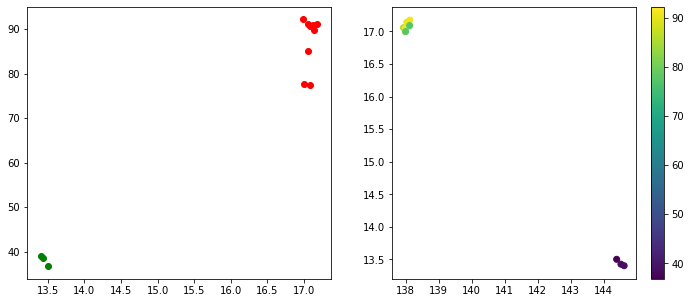

In [3]:
################# -------------------- TOGA - FIND FRONT -------------------- #################
fig, ax = plt.subplots(figsize=(12,5), ncols = 2)
#
shear = toga_df_rf06_bl[(toga_df_rf06_bl['GGLAT']>15)]
south = toga_df_rf06_bl[toga_df_rf06_bl['GGLAT']<15]
ax[0].scatter(shear['GGLAT'], shear['Benzene'], c = 'r')
ax[0].scatter(south['GGLAT'], south['Benzene'], c = 'g')

#
s = ax[1].scatter(toga_df_rf06_bl['GGLON'], toga_df_rf06_bl['GGLAT'], c = toga_df_rf06_bl['Benzene'])
cbar = fig.colorbar(s)

# use 16.5 - 18 N as the front 
# use south of 16.5 as before the front

In [4]:
################# -------------------- TOGA  -------------------- #################

In [7]:
# get mean in UT and BL for 1) flights in total and 2) individual flights 
toga_means = pd.DataFrame()

# rf08
toga_means['UT - RF06'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF06')].mean()

# in shear 
toga_means['BL - In Shear'] = shear.mean()

# south of shear 
toga_means['BL - S of Shear'] = south.mean()

toga_means = toga_means.drop('GGALT').drop('GGLAT').drop('GGLON')
#toga_means.index.name = "Trace_Gas"
toga_means = toga_means.reset_index()
toga_means = toga_means.rename(columns={'index': 'Trace_Gas'})
toga_means

,Trace_Gas,UT - RF06,BL - In Shear,BL - S of Shear
0,Acetaldehyde,5.044445,243.942856,241.724991
1,n_Butane,5.583489,132.101120,13.585000
2,i_Butane,3.976977,77.153336,10.655000
3,Benzene,6.202674,87.362213,38.149998
4,C3H8,50.127907,435.000000,113.500000
5,Methanol,41.309525,329.444458,821.666687
6,Bromoform,0.189454,1.336555,1.074750
7,Tetrachloroethylene,0.548954,2.881111,2.000000
8,Dibromomethane,0.895035,1.271111,1.108667
9,Dichloromethane,43.327087,72.295563,70.029999


In [8]:
# ratios for 1) flights in total and 2) individual flights 
toga_ratios = pd.DataFrame()

toga_ratios['Trace_Gas'] = toga_means['Trace_Gas']
toga_ratios['RF06_In Shear'] = toga_means['UT - RF06']/toga_means['BL - In Shear']
toga_ratios['RF06_S of Shear'] = toga_means['UT - RF06']/toga_means['BL - S of Shear']
toga_ratios

# drop species names so doesnt duplicate column when merged 
toga_ratios = toga_ratios.drop('Trace_Gas', axis = 1)

In [9]:
### add attribute to each species (BL, tropo, and UT lifetimes)
# read in from xls file to make dataframe
mypath2 = '/Volumes/scdrive2/TTS_2020/contrast_readin/toga_lodhalf/toga_lifetimes_12162019.xlsx'
toga_lifetimes = pd.read_excel(mypath2)

# merge lifetimes to ratios
toga_ratios_full = toga_lifetimes.merge(toga_ratios, left_index=True, right_index=True)
toga_ratios_full.insert(0, 'Instrument', 'TOGA')
toga_ratios_full

,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,RF06_In Shear,RF06_S of Shear
0,TOGA,Acetaldehyde,0.289063,0.365920,0.376967,0.020679,0.020869
1,TOGA,n_Butane,1.959376,3.813463,8.057685,0.042267,0.411004
2,TOGA,i_Butane,2.175570,4.031311,7.903592,0.051546,0.373250
3,TOGA,Benzene,3.755136,6.447323,11.947207,0.071000,0.162586
4,TOGA,C3H8,4.214557,9.062693,22.450000,0.115237,0.441656
5,TOGA,Methanol,5.160001,9.567463,20.040000,0.125391,0.050275
6,TOGA,Bromoform,15.069605,23.166062,33.432173,0.141748,0.176277
7,TOGA,Tetrachloroethylene,27.471720,77.860538,317.837040,0.190536,0.274477
8,TOGA,Dibromomethane,39.129546,95.533111,306.353687,0.704136,0.807307
9,TOGA,Dichloromethane,45.867749,109.800998,343.676023,0.599305,0.618693


//anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
//anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


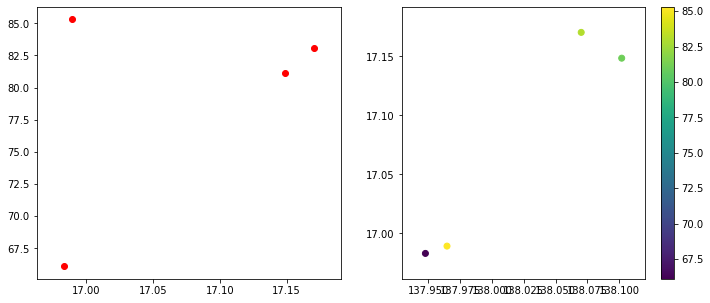

In [10]:
################# -------------------- AWAS - FIND FRONT -------------------- #################
fig, ax = plt.subplots(figsize=(12,5), ncols = 2)

# divide at 15 N
shear = awas_df_rf06_bl[(awas_df_rf06['GGLAT']>15)]
south = awas_df_rf06_bl[(awas_df_rf06['GGLAT']<15)]
ax[0].scatter(shear['GGLAT'], shear['C6H6_Benzene'], c = 'r')
ax[0].scatter(south['GGLAT'], south['C6H6_Benzene'], c = 'g')

#
s = ax[1].scatter(awas_df_rf06_bl['GGLON'], awas_df_rf06_bl['GGLAT'], c = awas_df_rf06_bl['C6H6_Benzene'])
cbar = fig.colorbar(s)


In [11]:
################# -------------------- AWAS -------------------- #################

In [12]:
# get mean in UT and BL for 1) flights in total and 2) individual flights 
awas_means = pd.DataFrame()

# rf08
awas_means['UT - RF06'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF06')].mean()

# in shear 
awas_means['BL - In Shear'] = shear.mean()

# south of shear 
awas_means['BL - S of Shear'] = south.mean()

awas_means = awas_means.drop('GGALT').drop('GGLAT').drop('GGLON')
#toga_means.index.name = "Trace_Gas"
awas_means = awas_means.reset_index()
awas_means = awas_means.rename(columns={'index': 'Trace_Gas'})

In [13]:
# ratios for 1) flights in total and 2) individual flights 
awas_ratios = pd.DataFrame()

awas_ratios['Trace_Gas'] = awas_means['Trace_Gas']
awas_ratios['RF06_In Shear'] = awas_means['UT - RF06']/awas_means['BL - In Shear']
awas_ratios['RF06_S of Shear'] = awas_means['UT - RF06']/awas_means['BL - S of Shear']

# drop species names so doesnt duplicate column when merged 
awas_ratios = awas_ratios.drop('Trace_Gas', axis = 1)
awas_ratios

,RF06_In Shear,RF06_S of Shear
0,0.288475,NaN
1,0.211982,NaN
2,0.089662,NaN
3,0.074645,NaN
4,0.077807,NaN
5,0.056251,NaN
6,0.157852,NaN
7,0.973487,NaN
8,0.013813,NaN
9,1.003645,NaN


In [14]:
### add attribute to each species (BL, tropo, and UT lifetimes)
# read in from xls file to make dataframe
mypath2 = '/Volumes/scdrive2/TTS_2020/contrast_readin/awas/awas_lifetimes_12162019.xlsx'
awas_lifetimes = pd.read_excel(mypath2)
len(awas_lifetimes)

# merge lifetimes to ratios 
awas_ratios_full = awas_lifetimes.merge(awas_ratios, left_index=True, right_index=True)
awas_ratios_full.insert(0, 'Instrument', 'AWAS')
awas_ratios_full

,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,RF06_In Shear,RF06_S of Shear
0,AWAS,C2H6_Ethane,18.555721,48.949092,167.260709,0.288475,NaN
1,AWAS,C2H2_Ethyne,5.422335,9.603369,18.712675,0.211982,NaN
2,AWAS,C3H8_Propane,4.214557,9.062693,22.450000,0.089662,NaN
3,AWAS,C4H10_Isobutane,2.175570,4.031311,7.903592,0.074645,NaN
4,AWAS,C4H10_nButane,1.959376,3.813463,8.057685,0.077807,NaN
5,AWAS,C5H12_nPentane,1.214449,2.312606,4.723079,0.056251,NaN
6,AWAS,C6H6_Benzene,3.755136,6.447323,11.947207,0.157852,NaN
7,AWAS,OCS_Carbonyl_sulfide,2000.000000,2000.000000,2000.000000,0.973487,NaN
8,AWAS,C2H6S_Dimethyl_sulfide,0.955122,1.689426,3.279163,0.013813,NaN
9,AWAS,CCl2F2_CFC_12,37000.000000,37000.000000,37000.000000,1.003645,NaN


In [15]:
################# -------------------- MERGE THE TWO  -------------------- #################

In [16]:
master_list = awas_ratios_full
master_list = master_list.append(toga_ratios_full, ignore_index = True, sort = None)

# pickle this!! 
master_list.to_pickle("./contrast_ratios_rf06.pkl")

# look at output 
master_list

,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,RF06_In Shear,RF06_S of Shear
0,AWAS,C2H6_Ethane,18.555721,48.949092,167.260709,0.288475,NaN
1,AWAS,C2H2_Ethyne,5.422335,9.603369,18.712675,0.211982,NaN
2,AWAS,C3H8_Propane,4.214557,9.062693,22.450000,0.089662,NaN
3,AWAS,C4H10_Isobutane,2.175570,4.031311,7.903592,0.074645,NaN
4,AWAS,C4H10_nButane,1.959376,3.813463,8.057685,0.077807,NaN
5,AWAS,C5H12_nPentane,1.214449,2.312606,4.723079,0.056251,NaN
6,AWAS,C6H6_Benzene,3.755136,6.447323,11.947207,0.157852,NaN
7,AWAS,OCS_Carbonyl_sulfide,2000.000000,2000.000000,2000.000000,0.973487,NaN
8,AWAS,C2H6S_Dimethyl_sulfide,0.955122,1.689426,3.279163,0.013813,NaN
9,AWAS,CCl2F2_CFC_12,37000.000000,37000.000000,37000.000000,1.003645,NaN
